In [25]:
import os
from PIL import Image
from glob import glob
        
for dirname, _, filenames in os.walk('/imagedata'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


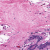

In [26]:
from PIL import Image

Image.open('imagedata/10253/0/10253_idx5_x1001_y1001_class0.png')

In [30]:
# get all of the file names
# use this to get cancer and benign images 
# then train test split
# Then transform to image array
# Then TRAIN!!!!
import keras
from tensorflow.keras.utils import load_img
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

nonCancer = glob('imagedata/*/0/*.png')
cancerous = glob('imagedata/*/1/*.png')

training = []
labels = []
# Turn file names into images to train the net

for i in range(1, 1000):
    imageBenign = load_img(nonCancer[i])
    imageCancer = load_img(cancerous[i])
    imageBenign = imageBenign.resize([30, 30])
    imageCancer = imageCancer.resize([30, 30])
    benignArray = tf.keras.utils.img_to_array(imageBenign)
    cancerArray = tf.keras.utils.img_to_array(imageCancer)
    training.append(benignArray)
    labels.append(0)
    training.append(cancerArray)
    labels.append(1)
    


Epoch 1/10
63/63 [==============================] - 1s 12ms/step - loss: 2.4545 - accuracy: 0.6071
Epoch 2/10
63/63 [==============================] - 1s 12ms/step - loss: 0.6234 - accuracy: 0.7047
Epoch 3/10
63/63 [==============================] - 1s 12ms/step - loss: 0.5111 - accuracy: 0.7693
Epoch 4/10
63/63 [==============================] - 1s 12ms/step - loss: 0.4902 - accuracy: 0.7763
Epoch 5/10
63/63 [==============================] - 1s 12ms/step - loss: 0.4779 - accuracy: 0.7898
Epoch 6/10
63/63 [==============================] - 1s 12ms/step - loss: 0.4199 - accuracy: 0.8188
Epoch 7/10
63/63 [==============================] - 1s 12ms/step - loss: 0.3802 - accuracy: 0.8388
Epoch 8/10
63/63 [==============================] - 1s 12ms/step - loss: 0.4551 - accuracy: 0.7948
Epoch 9/10
63/63 [==============================] - 1s 12ms/step - loss: 0.4601 - accuracy: 0.7988
Epoch 10/10
63/63 [==============================] - 1s 12ms/step - loss: 0.4710 - accuracy: 0.7923


KeyError: 'val_accuracy'

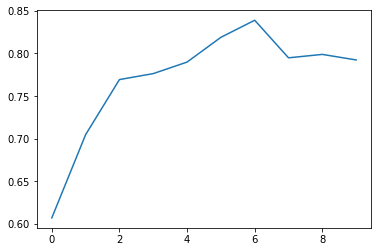

In [31]:
# define the model according to keras tutorial 
# https://www.tensorflow.org/tutorials/images/cnn#create_the_convolutional_base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(np.array(training), np.array(labels), epochs=10)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [38]:
# Clean Script
from glob import glob
import tensorflow as tf
from tensorflow.keras.utils import load_img

# Collect paths to images based on label
nonCancerPaths = glob('imagedata/*/0/*.png')
cancerousPaths = glob('imagedata/*/1/*.png')

# Turn filepaths into image arrays to train a model
def paths_to_image(paths, label):
    images = []
    labels = []
    for path in paths:
        image = load_img(path)
        image = image.resize([50, 50])
        imgArray = tf.keras.utils.img_to_array(image)
        images.append(imgArray)
        labels.append(label)
    return (images, labels)
nonCancerImages = paths_to_image(nonCancerPaths, 0)
cancerImages = paths_to_image(cancerousPaths, 1)

In [39]:
# Train Test Split train = (images, labels)
from sklearn.model_selection import train_test_split
allImages = nonCancerImages[0] + cancerImages[0]
allLabels = nonCancerImages[1] + cancerImages[1]

x_train, x_test, y_train, y_test = train_test_split(allImages, allLabels, test_size=.5, stratify= allLabels, random_state = 10)



(138762, 50, 50, 3)
(138762,)
Epoch 1/10
4337/4337 [==============================] - 235s 54ms/step - loss: 0.4937 - accuracy: 0.8155 - val_loss: 0.4271 - val_accuracy: 0.8149
Epoch 2/10
4337/4337 [==============================] - 223s 51ms/step - loss: 0.3860 - accuracy: 0.8349 - val_loss: 0.3863 - val_accuracy: 0.8302
Epoch 3/10
4337/4337 [==============================] - 220s 51ms/step - loss: 0.3636 - accuracy: 0.8460 - val_loss: 0.3474 - val_accuracy: 0.8544
Epoch 4/10
4337/4337 [==============================] - 215s 50ms/step - loss: 0.3519 - accuracy: 0.8509 - val_loss: 0.3439 - val_accuracy: 0.8544
Epoch 5/10
4337/4337 [==============================] - 213s 49ms/step - loss: 0.3484 - accuracy: 0.8525 - val_loss: 0.3330 - val_accuracy: 0.8592
Epoch 6/10
4337/4337 [==============================] - 219s 50ms/step - loss: 0.3436 - accuracy: 0.8547 - val_loss: 0.3560 - val_accuracy: 0.8544
Epoch 7/10
4337/4337 [==============================] - 224s 52ms/step - loss: 0.3394 - 

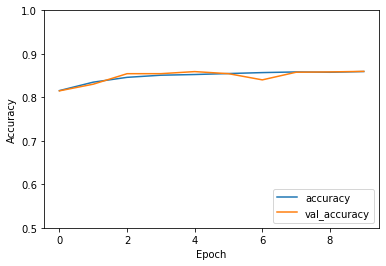

In [41]:
# define the model according to keras tutorial 
# https://www.tensorflow.org/tutorials/images/cnn#create_the_convolutional_base
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


print(np.array(x_train).shape)
print(np.array(y_train).shape)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(np.array(x_train), np.array(y_train), epochs=10, validation_data=(np.array(x_test), np.array(y_test)))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

4337/4337 - 36s - loss: 0.3354 - accuracy: 0.8597 - 36s/epoch - 8ms/step


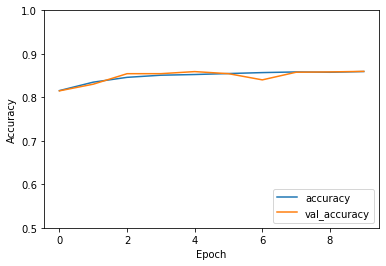

In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(np.array(x_test),  np.array(y_test), verbose=2)

In [47]:
test_acc

0.8597166538238525